## Project : Tool Wear Classification
### File : classify_inserts
Haddou Younes

In [354]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
import numpy as np
import h5py
import matplotlib.pyplot as plt
from math import exp, log


In [355]:
# -------------
# PRELIMINARY: LOAD DATASET AND PARTITION TRAIN-TEST SETS (NO NEED TO CHANGE
# ANYTHING)
# -------------

dir_output = "Output"
features_path = dir_output + "/features_geometric.h5"
labels_path = dir_output + "/labels_high-low.h5"
test_size = 0.3

h5f_data = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_inserts_geometric']
labels_string = h5f_label['dataset_inserts_geometric']

X = np.array(features_string)
Y = np.array(labels_string)
print(list(h5f_data.keys()))
h5f_data.close()
h5f_label.close()


# SPLIT DATA INTO TRAINING AND TEST SETS
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y,
                                                      test_size=test_size,
                                                      random_state=None)

# STANDARDIZE DATA
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("Mean of the training set: {}".format(X_train.mean(axis=0)))
print("Std of the training set: {}".format(X_train.std(axis=0)))
print("Mean of the test set: {}".format(X_test.mean(axis=0)))
print("Std of the test set: {}".format(X_test.std(axis=0)))


['dataset_inserts_geometric']
Mean of the training set: [-3.22461718e-17 -2.51477326e-14  9.96051153e-16 -9.41032122e-16
  1.69131848e-15  1.32872436e-16 -6.68102295e-16 -1.49604521e-17
  1.17242701e-15 -2.33855488e-15]
Std of the training set: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the test set: [-0.03184449 -0.02221638  0.0891499  -0.12733636 -0.11373762 -0.14821463
 -0.08422978  0.13809704  0.23843779 -0.3180818 ]
Std of the test set: [0.97560097 0.78409649 0.94406812 0.85093931 1.17780879 0.852296
 0.84182144 0.9921251  1.06853845 1.22354058]


In [327]:
def fun_sigmoid(theta, x):
    """
    This function calculates the sigmoid function g(z), where z is a linear
    combination of the parameters theta and the feature vector X's components
    
    Parameters
        ----------
        theta: numpy vector
            Parameters of the h function of the logistic regression classifier.
        x: numpy vector
            Vector containing the data of one pattern.
         ----------
    
    Returns
        -------
        g: float
            Result of applying the sigmoid function using the linear
            combination of theta and X.
        -------
    """

    # ====================== YOUR CODE HERE ======================
    g = 1/(1 + np.exp(-np.matmul(x,theta)))
    # ============================================================

    return g
a = np.array([[1,1],[2,2],[3,3]])
b = np.array([1,1])
np.matmul(a,b)


array([2, 4, 6])

In [328]:
def calculate_cost_LogReg(y, y_hat):
    """
    Calculates the cost of the OUTPUT OF JUST ONE pattern from the logistic
    regression classifier (i.e. the result of applying the h function) and
    its real class.
    
    Parameters
        ----------
        y: float
            Real class.
        y_hat: float
            Output of the h function (i.e. the hypothesis of the logistic
             regression classifier.
         ----------
    
    Returns
        -------
        cost_i: float
            Value of the cost of the estimated output y_hat.
        -------
    """

    # ====================== YOUR CODE HERE ======================
    cost_i = y*log(y_hat) + (1-y)*log(1-y_hat)
    # ============================================================

    return cost_i

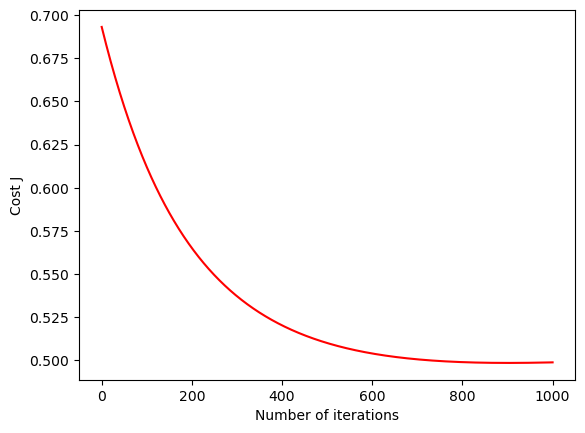

array([[-1.28459423,  0.29750833, -0.03905115, -0.09402835,  0.22654877,
        -0.17565346,  0.22977526,  0.5582284 , -0.11773638, -0.32226349,
        -0.12637535]])

In [336]:
def train_logistic_regression(X_train, Y_train, alpha):
    """
    This function implements the training of a logistic regression classifier
    using the training data (X_train) and its classes (Y_train).

    Parameters
        ----------
        X_train: Numpy array
            Matrix with dimensions (m x n) with the training data, where m is
            the number of training patterns (i.e. elements) and n is the number
            of features (i.e. the length of the feature vector which
            characterizes the object).
        Y_train: Numpy vector
            Vector that contains the classes of the training patterns. Its
            length is m.

    Returns
        -------
        theta: numpy vector
            Vector with length n (i.e, the same length as the number of
            features on each pattern). It contains the parameters theta of the
            hypothesis function obtained after the training.

    """
    # CONSTANTS
    # =================
    verbose = True
    max_iter = 1000  # You can try with a different number of iterations
    # =================

    # Number of training patterns.
    m = np.shape(X_train)[0]

    # Allocate space for the outputs of the hypothesis function for each
    # training pattern
    h_train = np.zeros(shape=(1, m))

    # Allocate spaces for the values of the cost function on each iteration
    J = np.zeros(shape=(1, 1 + max_iter))

    # Initialize the vector to store the parameters of the hypothesis function
    theta = np.zeros(shape=(1, 1 + np.shape(X_train)[1]))
    # -------------
    # CALCULATE THE VALUE OF THE COST FUNCTION FOR THE INITIAL THETAS
    # -------------
    # a. Intermediate result: Get the error for each element to sum it up.
    total_cost = 0
    for i in range(m):

        # Add a 1 (i.e., the value for x0) at the beginning of each pattern
        x_i = np.insert(np.array([X_train[i]]), 0, 1, axis=1)

        # Expected output (i.e. result of the sigmoid function) for i-th
        # pattern
        # ====================== YOUR CODE HERE ======================
        ##Les theta sont init
        Expected_Output = fun_sigmoid(theta[0],x_i[0])
        # ============================================================

        # Calculate the cost for the i-the pattern and add it to the cost of
        # the last patterns
        # ====================== YOUR CODE HERE ======================
        cost_pattern_i = calculate_cost_LogReg(Y_train[i],Expected_Output)
        total_cost = total_cost + cost_pattern_i
        # ============================================================

    # b. Calculate the total cost
    # ====================== YOUR CODE HERE ======================
    total_cost = - (total_cost/m) 
    J[0, 0] = total_cost
    # ============================================================

    # -------------
    # GRADIENT DESCENT ALGORITHM TO UPDATE THE THETAS
    # -------------
    # Iterative method carried out during a maximum number (max_iter) of
    # iterations
    for num_iter in range(max_iter):
        # ------
        # STEP 1. Calculate the value of the h function with the current theta
        # values
        # FOR EACH SAMPLE OF THE TRAINING SET
        for i in range(m):
            # Add a 1 (i.e., the value for x0) at the beginning of each pattern
            x_i = np.insert(np.array([X_train[i]]), 0, 1, axis=1)

            # Expected output (i.e. result of the sigmoid function) for i-th
            # pattern
            # ====================== YOUR CODE HERE ======================
            h_i = fun_sigmoid(theta[0],x_i[0])
            # ============================================================

            # Store h_i for future use
    
            h_train[0,i] = h_i
     
        # ------
        # STEP 2. Update the theta values. To do it, follow the update
        # equations that you studied in the theoretical session
        # a. Intermediate result: Calculate the (h_i-y_i)*x for EACH element
        # from the training set
        # ====================== YOUR CODE HERE ======================
        theta[0] = theta[0]-np.array((1/m)*alpha*np.matmul(h_train - Y_train, np.insert(X_train,0,1,axis=1)))
        # ============================================================
        
        # ------
        # STEP 3: Calculate the cost on this iteration and store it on vector J
        # ====================== YOUR CODE HERE ======================
        New_Expected_Output = fun_sigmoid(theta[0],np.insert(X_train,0,1,axis=1))
        new_total_cost = 0
        for i in range(m):
            new_cost_i = calculate_cost_LogReg(Y_train[i],New_Expected_Output[0])
            new_total_cost = new_total_cost + new_cost_i
        
        J[0, num_iter+1] = - (new_total_cost/m)
      
        # ============================================================

    # If verbose is True, plot the cost as a function of the iteration number
    if verbose:
        plt.plot(J[0], color='red')
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost J')
        plt.show()
    return theta


train_logistic_regression(X_train,Y_train,0.01)

We notice that when we increase the alpha, the learning is faster but less stable (the curve becomes noisy) and also the minimum error J is less efficient.

In [330]:
def classify_logistic_regression(X_test, theta):
    """
    This function returns the probability for each pattern of the test set to
    belong to the positive class using the logistic regression classifier.

    Parameters
        ----------
        X_test: Numpy array
            Matrix with dimension (m_t x n) with the test data, where m_t
            is the number of test patterns and n is the number of features
            (i.e. the length of the feature vector that define each element).
        theta: numpy vector
            Parameters of the h function of the logistic regression classifier.

    Returns
        -------
        y_hat: numpy vector
            Vector of length m_t with the estimations made for each test
            element by means of the logistic regression classifier. These
            estimations corredspond to the probabilities that these elements
            belong to the positive class.
    """

    num_elem_test = np.shape(X_test)[0]
    y_hat = np.zeros(shape=(1, num_elem_test))

    for i in range(num_elem_test):
        # Add a 1 (value for x0) at the beginning of each pattern
        x_test_i = np.insert(np.array([X_test[i]]), 0, 1, axis=1)
        # ====================== YOUR CODE HERE ======================
        y_hat_i = fun_sigmoid(theta[0],x_test_i[0])
        y_hat[0, i] = y_hat_i
        # ============================================================

    return y_hat

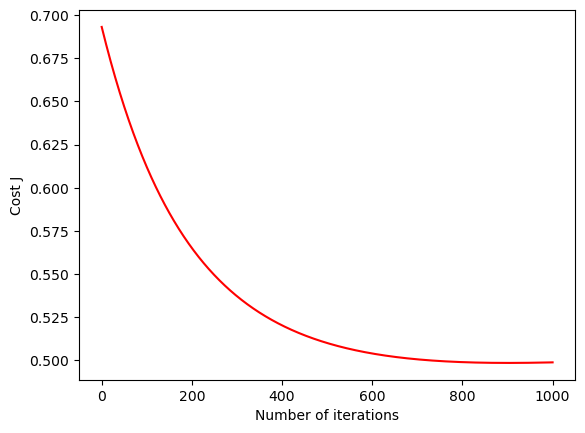

[[45  2]
 [ 9  5]]
***************
The accuracy of the Logistic Regression classifier is 0.8197
***************

***************
The F1-score of the Logistic Regression classifier is 0.8654
***************


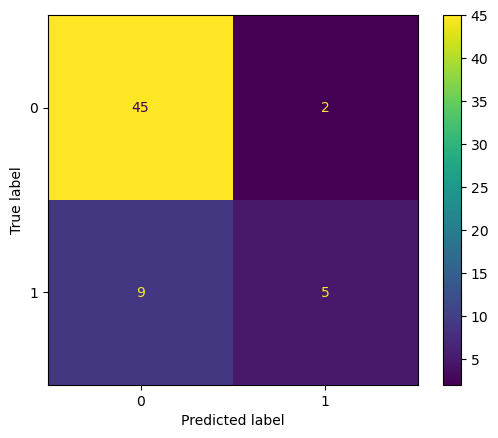

In [337]:
# -------------
# PART 2.1: TRAINING OF THE CLASSIFIER AND CLASSIFICATION OF THE TEST SET
# -------------

# TRAINING

# Learning rate. Change it accordingly, depending on how the cost function
# evolve along the iterations
alpha = 0.01

# The function fTrain_LogisticReg implements the logistic regression
# classifier. Open it and complete the code.
theta = train_logistic_regression(X_train, Y_train, alpha)

# print(theta)

# -------------
# CLASSIFICATION OF THE TEST SET
# -------------
Y_test_hat = classify_logistic_regression(X_test, theta)

# Assignation of the class: If the probability is higher than or equal
# to 0.5, then assign it to class 1
Y_test_asig = Y_test_hat >= 0.5

# -------------
# PART 2.2: PERFORMANCE OF THE CLASSIFIER: CALCULATION OF THE ACCURACY AND
# FSCORE
# -------------

# Show confusion matrix
Y_test = np.array([Y_test.astype(bool)])
confm = confusion_matrix(Y_test.T, Y_test_asig.T)
print(confm)
disp = ConfusionMatrixDisplay(confusion_matrix=confm)
disp.plot()


# -------------
# ACCURACY AND F-SCORE
# -------------
# ====================== YOUR CODE HERE ======================
TP, FP, FN, TN = confm.ravel()
accuracy = (TP + TN)/ (TP + TN + FP + FN)
precision = TP / (TP + TN)
recall = TP / (TP + FN)
f_score = 2*((precision*recall)/(precision + recall))
# ============================================================

print("***************")
print("The accuracy of the Logistic Regression classifier is {:.4f}".
      format(accuracy))
print("***************")


print("")
print("***************")
print("The F1-score of the Logistic Regression classifier is {:.4f}".
      format(f_score))
print("***************")


## Conclusion:

The accuracy is good, and it can go up to 0.9 depending on the seed you use. For a handmade model, it is rather good for the classification of the wear of the tools because contrary to health for example we can afford a larger margin of error.

### OPTIONAL TASK: ROC Curve

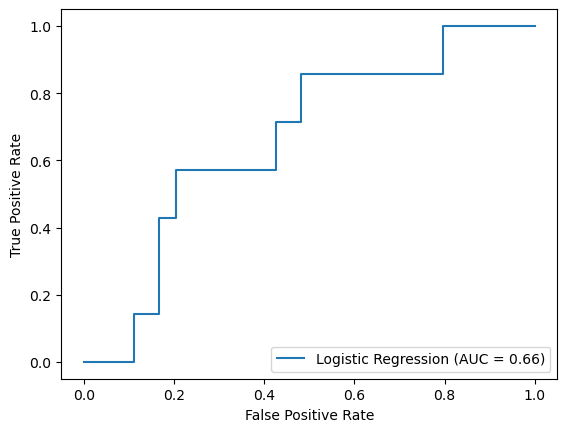

In [353]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_hat[0])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Logistic Regression')
display.plot()
plt.show()